# Week 11-12: Satellite NPP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### use xarray library to read in the netCDF file

In [2]:
# Behrenfeld and Falkowski (1997)
ds=xr.open_dataset('NPP_VGPM_MODISR18_3x3_2003_2018.nc')
ds 
# ds is the data object, 'ds' shows its data name and attributes

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 60, time: 192)
Coordinates:
  * lon      (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * time     (time) datetime64[ns] 2003-01-16 2003-02-16 ... 2018-12-16
Data variables:
    NPP      (time, lat, lon) float64 ...
Attributes:
    title:         Net Primary Production based on Standard VGPM of Behrenfel...
    Conventions:   CF-1.6
    CreationDate:  2021/11/03 12:45:06

### generate time average (long term mean) and make a global map quickly

Variables can be accessed as ds.VarName

To take averages, you can use intuitive dimension name (rather than n-th axis)

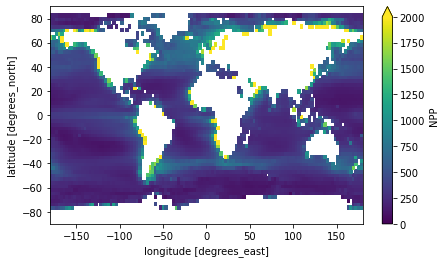

In [3]:
NPP_mean=ds.NPP.mean(dim='time')
plt.figure(figsize=(7,4))
NPP_mean.plot(vmin=0,vmax=2000)

# save the figure (png and pdf)
#fn='Fig_NPP_ave'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

### select a specific location and draw time series

ds.VarName.sel select a certain portion of the data (in time or space)

ds.VarName.sel(lat=40,lon=-50,method="nearest") will find data from nearest grid cell to 40N, 50W. 

ds.VarName.sel(time="2010-01")) will find data for January 2010

ds.VarName.sel(time=slice("2010-01-01","2015-12-31")) will find all of the data between January 1st 2010 to December 31st 2015


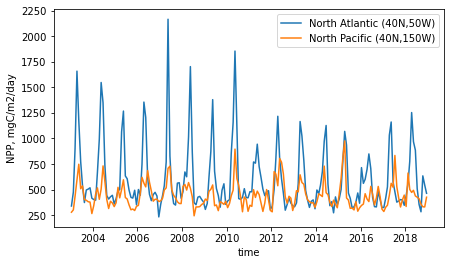

In [4]:
plt.figure(figsize=(7,4))

# North Atlantic, 40N, 50W
NPP_NA=ds.NPP.sel(lat=40,lon=-50,method="nearest")
plt.plot(ds.time,NPP_NA,label='North Atlantic (40N,50W)')

# North Pacific, 40N 150W
NPP_NP=ds.NPP.sel(lat=40,lon=-150,method="nearest")
plt.plot(ds.time,NPP_NP,label='North Pacific (40N,150W)')

plt.legend()
plt.ylabel('NPP, mgC/m2/day')
plt.xlabel('time')

#fn='Fig_NPP_timeseries'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

### select a specific month and draw NPP maps

ds.VarName.sel(time=ds['time.month']==1).mean(dim='time') takes time average of all January data

ds.VarName.sel(time=ds['time.month']==7).mean(dim='time') takes time average of all July data

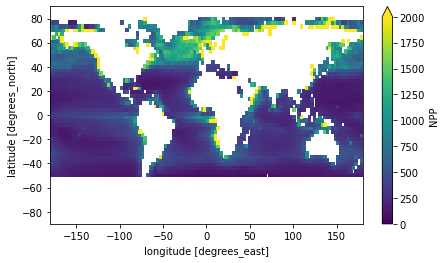

In [25]:
# calculate July average (from all years)
NPP_jul = ds.NPP.sel(time=ds['time.month']==7).mean(dim='time')

plt.figure(figsize=(7,4))
NPP_jul.plot(vmin=0,vmax=2000)
#fn='Fig_NPP_july'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

### Group the data by month and take averages for all years, then perform zonal mean (averaging all longitude), plot the result as a function of latitude for 4 months (Jan, Apr, Jul, Oct)

ds.VarName.groupby('time.month') groups the data into 12 months

ds.VarName.groupby('time.month').mean(dim='time') takes the averages over all years for each month


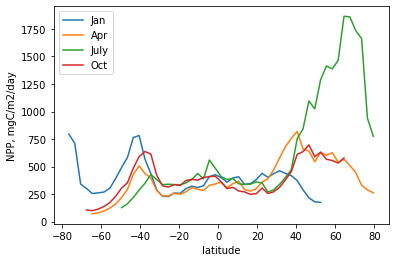

In [27]:
NPPc=ds.NPP.groupby('time.month').mean(dim='time')
NPPcx=NPPc.mean(dim='lon')

# plot Jan
plt.plot(ds.lat,NPPcx[0,:],label='Jan')
# plot April
plt.plot(ds.lat,NPPcx[3,:],label='Apr')
# plot July
plt.plot(ds.lat,NPPcx[6,:],label='July')
# plot Oct
plt.plot(ds.lat,NPPcx[9,:],label='Oct')

plt.xlabel('latitude')
plt.ylabel('NPP, mgC/m2/day')
plt.legend()
plt.show()